In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Top_1000_IMDb_movies_New_version.csv", index_col=0 )

df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df['Votes'] = df['Votes'].astype(int)

convert = ['Year of Release', 'Gross']
df[convert] = df[convert].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

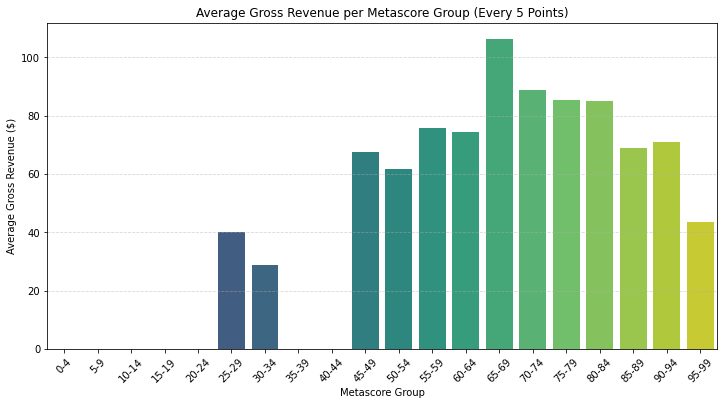

In [5]:
bins = list(range(0, 101, 5))
labels = [f'{i}-{i+4}' for i in bins[:-1]]

df['Metascore Group'] = pd.cut(df['Metascore of movie'], bins=bins, labels=labels, right=False)

average_gross = df.groupby('Metascore Group')['Gross'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Metascore Group', y='Gross', data=average_gross, palette='viridis')

plt.title('Average Gross Revenue per Metascore Group (Every 5 Points)')
plt.xlabel('Metascore Group')
plt.ylabel('Average Gross Revenue ($)')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.grid(axis='y', alpha=0.5, linestyle='dashed')

plt.show()

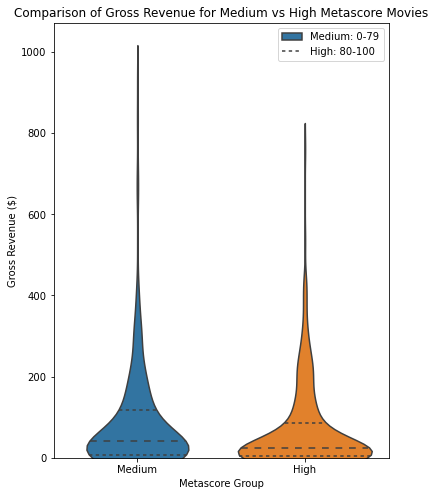

In [7]:
bins = [0, 80, 100]  
plt.figure(figsize=(6,8))
labels = ['Medium', 'High']
df['Metascore Group'] = pd.cut(df['Metascore of movie'], bins=bins, labels=labels)

sns.violinplot(x='Metascore Group', y='Gross', data=df, inner='quartile')

plt.title('Comparison of Gross Revenue for Medium vs High Metascore Movies')
plt.ylabel('Gross Revenue ($)')
plt.xlabel('Metascore Group')
plt.legend(['Medium: 0-79', 'High: 80-100'])
plt.ylim(bottom=0)

plt.show()



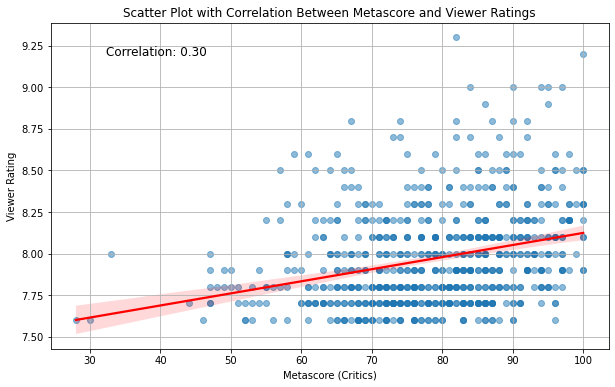

In [15]:
correlation = df['Metascore of movie'].corr(df['Movie Rating'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Metascore of movie', y='Movie Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.1, 0.9),
             xycoords='axes fraction', 
             fontsize=12)
plt.title('Scatter Plot with Correlation Between Metascore and Viewer Ratings')
plt.xlabel('Metascore (Critics)')
plt.ylabel('Viewer Rating')
plt.grid(True)
plt.show()